# Activites List

Here are some of the tasks you need to perform:

### Activity 1

- Aggregate data into one Data Frame using Pandas.
- Standardizing header names
- Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
- Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints )
- Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
- Removing duplicates
- Replacing null values – Replace missing values with means of the column (for numerical columns)

### Activity 2

- Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
- Standardizing the data – Use string functions to standardize the text data (lower case)

### Activity 3

- Which columns are numerical?
- Which columns are categorical?
- Check and deal with NaN values. (Hint:Replacing null values – Replace missing values with means of the column (for numerical columns)).
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
### Activity 4

- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

### Activity 5

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features



**Activity 1**

In [121]:
import pandas as pd
import numpy as np
pd.set_option('display.max.row', 100) 

In [122]:
file1 = pd.read_csv('Data/file1.csv')
file2= pd.read_csv('Data/file2.csv')
file3=pd.read_csv('Data/file3.csv')

In [123]:
#fetching new data with total number of responses & sales channel
df=pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [124]:
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [125]:
#standarise the header names
file1.rename(columns={'ST':'State', 'GENDER':'Gender'}, inplace=True)
file2.rename(columns={'ST':'State', 'GENDER':'Gender'}, inplace=True)

In [126]:
#Agregating data into a data frame called ca_da
ca_da=pd.concat([file1,file2,file3],axis=0).reset_index(drop=True)  #resetting the index

#adding the the new series with response sales channel
ca_da=pd.concat([ca_da, df[['Response','Sales Channel']]],axis=1)  

#first we use lower case 
ca_da.columns=[i.lower() for i in ca_da.columns]

In [127]:
# delete the column customer
ca_da.drop(columns=['customer'], inplace=True)

In [128]:
# Check the data types of all the columns and fix the incorrect ones
ca_da.dtypes

state                         object
gender                        object
education                     object
customer lifetime value       object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
response                      object
sales channel                 object
dtype: object

In [129]:
#change incorrect data types
ca_da['customer lifetime value'] =  pd.to_numeric(ca_da['customer lifetime value'], errors='coerce')
ca_da['number of open complaints']= pd.to_numeric(ca_da['number of open complaints'], errors='coerce')

In [130]:
ca_da.dtypes

state                         object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints    float64
policy type                   object
vehicle class                 object
total claim amount           float64
response                      object
sales channel                 object
dtype: object

In [131]:
ca_da

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,response,sales channel
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934,No,Agent
1,Arizona,F,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935,No,Call Center
2,Nevada,F,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247,No,Call Center
3,California,M,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344,Yes,Branch
4,Washington,M,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323,No,Branch
...,...,...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764,NaN,NaN
12070,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000,NaN,NaN
12071,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983,NaN,NaN
12072,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000,NaN,NaN


In [132]:
#filtering data for the Gender column
ca_da.gender.unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [133]:
ca_da["gender"]= ca_da.gender.fillna ("U")   #filling the nan with U instead 

In [134]:
ca_da.gender.unique()

array(['U', 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [135]:
#answer with a function - replacing the rest with either F or M
def clean_gender(x):
    if x in ['F','Female', 'Femal']: 
        return 'F'
    elif x in ['M','Male', 'male']: 
        return 'M'
    else: 
        return 'U'

In [136]:
#calling the function 
ca_da['gender']= list(map(clean_gender, ca_da['gender']))

In [137]:
ca_da.gender.value_counts()

F    4577
M    4408
U    3089
Name: gender, dtype: int64

In [138]:
#Filter the data in state column to standardize the name of the states
ca_da['state'].value_counts(dropna=False)

California    3032
NaN           2937
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: state, dtype: int64

In [139]:
#replacing the names of overlapping states & and assign Unknown instead on NaN
ca_da.state.replace('Cali', 'California', inplace=True)
ca_da.state.replace('WA', 'Washington', inplace=True)
ca_da.state.replace('AZ', 'Arizona', inplace=True)
ca_da["state"]= ca_da.state.fillna ("Unknown")

In [140]:
ca_da['state'].value_counts(dropna=False)

California    3152
Unknown       2937
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: state, dtype: int64

In [141]:
ca_da['state'].value_counts(dropna=False)

California    3152
Unknown       2937
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: state, dtype: int64

In [142]:
#removing duplicates 
ca_da.drop_duplicates()

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,response,sales channel
0,Washington,U,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934,No,Agent
1,Arizona,F,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935,No,Call Center
2,Nevada,F,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247,No,Call Center
3,California,M,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344,Yes,Branch
4,Washington,M,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323,No,Branch
...,...,...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764,NaN,NaN
12070,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000,NaN,NaN
12071,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983,NaN,NaN
12072,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000,NaN,NaN


In [143]:
#Replace missing values with means of the column (for numerical columns), those columns are: 
ca_da._get_numeric_data()

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
0,NaN,0.0,1000.0,NaN,2.704934
1,NaN,0.0,94.0,NaN,1131.464935
2,NaN,48767.0,108.0,NaN,566.472247
3,NaN,0.0,106.0,NaN,529.881344
4,NaN,36357.0,68.0,NaN,17.269323
...,...,...,...,...,...
12069,23405.987980,71941.0,73.0,0.0,198.234764
12070,3096.511217,21604.0,79.0,0.0,379.200000
12071,8163.890428,0.0,85.0,3.0,790.784983
12072,7524.442436,21941.0,96.0,0.0,691.200000


In [144]:
a_series = (ca_da != 0).any(axis=1)
ca_da = ca_da.loc[a_series]
ca_da           #I thought I deleted the zero values here ?

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,response,sales channel
0,Washington,U,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934,No,Agent
1,Arizona,F,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935,No,Call Center
2,Nevada,F,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247,No,Call Center
3,California,M,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344,Yes,Branch
4,Washington,M,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323,No,Branch
...,...,...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764,NaN,NaN
12070,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000,NaN,NaN
12071,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983,NaN,NaN
12072,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000,NaN,NaN


In [145]:
#beside NaN values, plently have zeros which we should delete 

ca_da= ca_da[ca_da.income !=0] # deleting all rows with zero values 


In [146]:
#finding out how many null values do we have 
nulls_df=round(ca_da.isna().sum()/len(ca_da),4)*100
nulls_df

state                         0.00
gender                        0.00
education                    30.03
customer lifetime value      46.33
income                       30.03
monthly premium auto         30.03
number of open complaints    46.33
policy type                  30.03
vehicle class                30.03
total claim amount           30.03
response                     14.23
sales channel                 8.68
dtype: float64

In [147]:
#we don't have high number of null values in certain columns (high number would be a +70%)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,state,0.00
1,gender,0.00
2,education,30.03
3,customer lifetime value,46.33
4,income,30.03
5,monthly premium auto,30.03
6,number of open complaints,46.33
7,policy type,30.03
8,vehicle class,30.03
9,total claim amount,30.03


In [148]:
#let's assume that the customer lifetime value & number of open complaints has +70% of nulls 
nulls_columns=nulls_df[nulls_df['percent_nulls']>41]['header_name']
nulls_columns

3      customer lifetime value
6    number of open complaints
Name: header_name, dtype: object

#trying to replace nans using for function
def replace_w_average(n):
    for n in [ca_da._get_numeric_data()]:
        ca_da[n].fillna(value=ca_da[n].mean(), inplace=True)
        return ca_da[n]
    replace_w_

In [149]:
ca_da.describe()    #checking whether to use the median or the mean

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
count,5249.000000,6843.000000,6843.000000,5249.000000,6843.000000
mean,8147.381711,50510.292416,114.322665,0.380263,374.664285
std,7045.407506,24290.459946,660.179537,0.914504,251.404565
min,2119.894333,10037.000000,61.000000,0.000000,0.099007
25%,4091.934934,28494.000000,68.000000,0.000000,207.751860
50%,5815.261714,48115.000000,82.000000,0.000000,340.800000
75%,9035.671134,70263.000000,109.000000,0.000000,494.400000
max,83325.381190,99981.000000,35354.000000,5.000000,2893.239678


In [150]:
#replacing null values with the mean/median value in these 5 columns 

ca_da['customer lifetime value'].fillna(value=ca_da['customer lifetime value'].median(), inplace=True)
ca_da['income'].fillna(value=ca_da['income'].mean(), inplace=True)
ca_da['monthly premium auto'].fillna(value=ca_da['monthly premium auto'].median(), inplace=True)
ca_da['number of open complaints'].fillna(value=ca_da['number of open complaints'].mean(), inplace=True)
ca_da['total claim amount'].fillna(value=ca_da['total claim amount'].mean(), inplace=True)

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [151]:
#checking again how many null values there are 
nulls_df=round(ca_da.isna().sum()/len(ca_da),4)*100  
nulls_df

state                         0.00
gender                        0.00
education                    30.03
customer lifetime value       0.00
income                        0.00
monthly premium auto          0.00
number of open complaints     0.00
policy type                  30.03
vehicle class                30.03
total claim amount            0.00
response                     14.23
sales channel                 8.68
dtype: float64

**Activity 2**

In [152]:
ca_da.state

2            Nevada
4        Washington
5            Oregon
6            Oregon
8            Oregon
            ...    
12067    California
12068    California
12069    California
12070    California
12072    California
Name: state, Length: 9780, dtype: object

In [153]:
#Bucketing the data - Write a function to replace column "State" to different zones. 
#California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

zones = {
    "West Region": "California",
    "Nort West": "Oregon",
    "East": "Washington",
    "Cental": ["Arizona", "Nevada"]
}
ca_da["zones"] = (
    ca_da["state"]
    .apply(lambda x: [k for k in zones.keys() if x in zones[k]])
    .str[0]
    )

/var/folders/zg/6052zdgj2vs5d59k44zmww6m0000gn/T/ipykernel_4322/1902194210.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_da["zones"] = (


In [154]:
#Standardizing the data – Use string functions to standardize the text data (lower case)
ca_da["zones"] = ca_da["zones"].str.lower()

/var/folders/zg/6052zdgj2vs5d59k44zmww6m0000gn/T/ipykernel_4322/1982024438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_da["zones"] = ca_da["zones"].str.lower()


In [155]:
ca_da

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,response,sales channel,zones
2,Nevada,F,Bachelor,5815.261714,48767.0,108.0,0.380263,Personal Auto,Two-Door Car,566.472247,No,Call Center,cental
4,Washington,M,High School or Below,5815.261714,36357.0,68.0,0.380263,Personal Auto,Four-Door Car,17.269323,No,Branch,east
5,Oregon,F,Bachelor,5815.261714,62902.0,69.0,0.380263,Personal Auto,Two-Door Car,159.383042,NaN,Agent,nort west
6,Oregon,F,College,5815.261714,55350.0,67.0,0.380263,Corporate Auto,Four-Door Car,321.600000,No,Branch,nort west
8,Oregon,M,Bachelor,5815.261714,14072.0,71.0,0.380263,Corporate Auto,Four-Door Car,511.200000,Yes,Branch,nort west
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12067,California,M,College,5032.165498,66367.0,64.0,0.000000,Personal Auto,Two-Door Car,307.200000,NaN,NaN,west region
12068,California,F,College,4100.398533,47761.0,104.0,0.000000,Personal Auto,Four-Door Car,541.282007,NaN,NaN,west region
12069,California,M,Bachelor,23405.987980,71941.0,73.0,0.000000,Personal Auto,Four-Door Car,198.234764,NaN,NaN,west region
12070,California,F,College,3096.511217,21604.0,79.0,0.000000,Corporate Auto,Four-Door Car,379.200000,NaN,NaN,west region


**Activity 3**

In [156]:
#numerical columns
ca_da._get_numeric_data()

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
2,5815.261714,48767.0,108.0,0.380263,566.472247
4,5815.261714,36357.0,68.0,0.380263,17.269323
5,5815.261714,62902.0,69.0,0.380263,159.383042
6,5815.261714,55350.0,67.0,0.380263,321.600000
8,5815.261714,14072.0,71.0,0.380263,511.200000
...,...,...,...,...,...
12067,5032.165498,66367.0,64.0,0.000000,307.200000
12068,4100.398533,47761.0,104.0,0.000000,541.282007
12069,23405.987980,71941.0,73.0,0.000000,198.234764
12070,3096.511217,21604.0,79.0,0.000000,379.200000


In [208]:
ca_da_category = ca_da.select_dtypes(include=['object'])  
ca_da_category     

,state,gender,education,policy type,vehicle class,response,sales channel,zones
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car,No,Call Center,cental
4,Washington,M,High School or Below,Personal Auto,Four-Door Car,No,Branch,east
5,Oregon,F,Bachelor,Personal Auto,Two-Door Car,Y/N,Agent,nort west
6,Oregon,F,College,Corporate Auto,Four-Door Car,No,Branch,nort west
8,Oregon,M,Bachelor,Corporate Auto,Four-Door Car,Yes,Branch,nort west
...,...,...,...,...,...,...,...,...
12067,California,M,College,Personal Auto,Two-Door Car,Y/N,Unknown,west region
12068,California,F,College,Personal Auto,Four-Door Car,Y/N,Unknown,west region
12069,California,M,Bachelor,Personal Auto,Four-Door Car,Y/N,Unknown,west region
12070,California,F,College,Corporate Auto,Four-Door Car,Y/N,Unknown,west region


In [209]:
#Check and deal with NaN values. this was done previously, but since these two columns were added later :
ca_da['sales channel'].fillna(value='Unknown', inplace=True)
ca_da['response'].fillna(value='Y/N', inplace=True)

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [159]:
#Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only the information for the first quarter , ie. January, February and March. 
#Hint: If data from March does not exist, consider only January and February.

**Activity 4**

In [160]:
ca_da.columns

Index(['state', 'gender', 'education', 'customer lifetime value', 'income',
       'monthly premium auto', 'number of open complaints', 'policy type',
       'vehicle class', 'total claim amount', 'response', 'sales channel',
       'zones'],
      dtype='object')

In [161]:
# importing matplotlib & seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

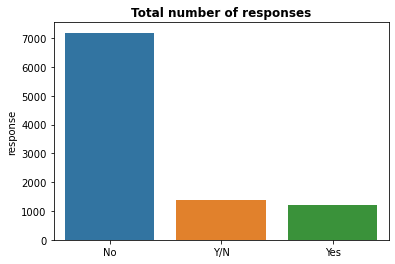

In [162]:
# Show a plot of the total number of responses.

#we first need to count the responses 
response = ca_da['response'].value_counts()
#plotting a bar plot 
ax1=sns.barplot(x=response.index ,y =response);
#adding a title
ax1.set_title("Total number of responses", fontweight='bold');

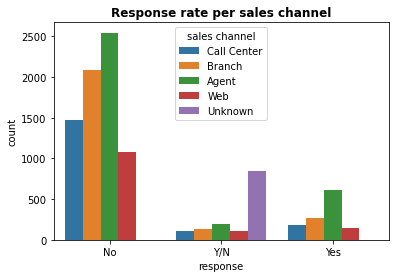

In [163]:
#Show a plot of the response rate by the sales channel.

#we first define the axis 
#y= the count of responses 
#x=response(as yes/no)
#the best fitting plot is a countplot

ax2= sns.countplot(data=ca_da, x="response", hue="sales channel");
#adding a title
ax2.set_title("Response rate per sales channel", fontweight='bold');

In [164]:

ca_da["total claim amount"]


2        566.472247
4         17.269323
5        159.383042
6        321.600000
8        511.200000
            ...    
12067    307.200000
12068    541.282007
12069    198.234764
12070    379.200000
12072    691.200000
Name: total claim amount, Length: 9780, dtype: float64

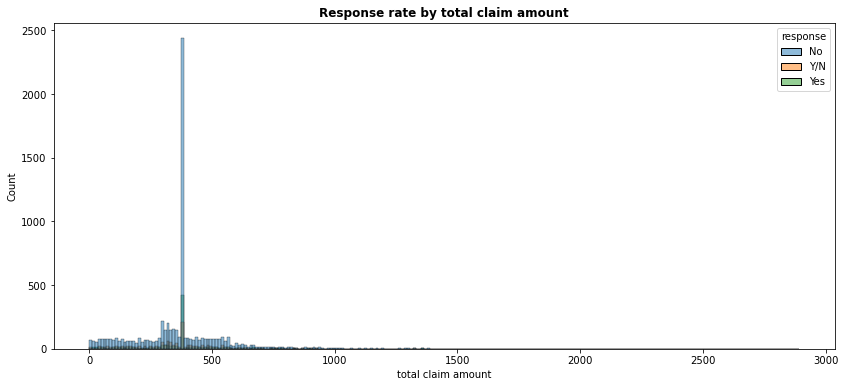

In [165]:
#Show a plot of the response rate by the total claim amount
fig,ax=plt.subplots(figsize=(14,6))

sns.histplot(data=ca_da, x="total claim amount", ax=ax, hue='response');
ax.set_title("Response rate by total claim amount", fontweight='bold');

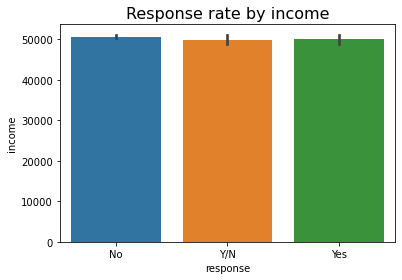

In [166]:
#Show a plot of the response rate by income.

ax4=sns.barplot(data=ca_da, x='response' ,y ="income");
ax4.set_title("Response rate by income", fontsize=16);

In [167]:
#Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
#Plot the Correlation Heatmap.

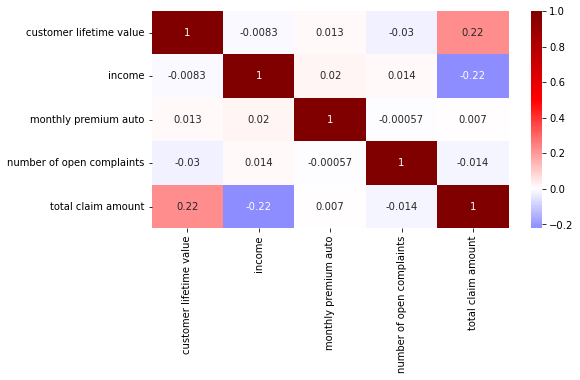

In [168]:
#Plot the Correlation Heatmap.
#showing the correlation between the different variables 
corr=ca_da.corr()

# Setting up the plot 
f, ax = plt.subplots(figsize=(8, 4))

# Draw the heatmap
heat_map=sns.heatmap(corr, annot=True, cmap='seismic', center=0)


### Activity 5

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

## Activity 6

- X-y split

In [169]:
ca_da

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,response,sales channel,zones
2,Nevada,F,Bachelor,5815.261714,48767.0,108.0,0.380263,Personal Auto,Two-Door Car,566.472247,No,Call Center,cental
4,Washington,M,High School or Below,5815.261714,36357.0,68.0,0.380263,Personal Auto,Four-Door Car,17.269323,No,Branch,east
5,Oregon,F,Bachelor,5815.261714,62902.0,69.0,0.380263,Personal Auto,Two-Door Car,159.383042,Y/N,Agent,nort west
6,Oregon,F,College,5815.261714,55350.0,67.0,0.380263,Corporate Auto,Four-Door Car,321.600000,No,Branch,nort west
8,Oregon,M,Bachelor,5815.261714,14072.0,71.0,0.380263,Corporate Auto,Four-Door Car,511.200000,Yes,Branch,nort west
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12067,California,M,College,5032.165498,66367.0,64.0,0.000000,Personal Auto,Two-Door Car,307.200000,Y/N,Unknown,west region
12068,California,F,College,4100.398533,47761.0,104.0,0.000000,Personal Auto,Four-Door Car,541.282007,Y/N,Unknown,west region
12069,California,M,Bachelor,23405.987980,71941.0,73.0,0.000000,Personal Auto,Four-Door Car,198.234764,Y/N,Unknown,west region
12070,California,F,College,3096.511217,21604.0,79.0,0.000000,Corporate Auto,Four-Door Car,379.200000,Y/N,Unknown,west region


***x-y split***

In [170]:
ca_da.rename(columns={'total claim amount':'total_claim_amount'}, inplace=True)

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [179]:
x=ca_da.drop('total_claim_amount', axis=1)
y=ca_da.total_claim_amount

In [180]:
X=X._get_numeric_data()
X

,customer lifetime value,income,monthly premium auto,number of open complaints
2,5815.261714,48767.0,108.0,0.380263
4,5815.261714,36357.0,68.0,0.380263
5,5815.261714,62902.0,69.0,0.380263
6,5815.261714,55350.0,67.0,0.380263
8,5815.261714,14072.0,71.0,0.380263
...,...,...,...,...
12067,5032.165498,66367.0,64.0,0.000000
12068,4100.398533,47761.0,104.0,0.000000
12069,23405.987980,71941.0,73.0,0.000000
12070,3096.511217,21604.0,79.0,0.000000


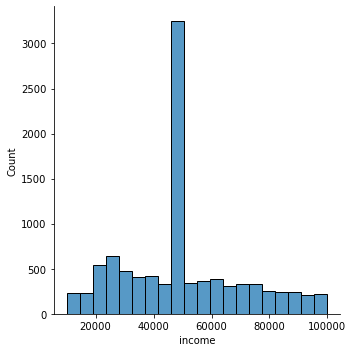

In [181]:
ax=sns.displot(x=ca_da.income, bins=20)

- Normalize (numerical).

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
X_scaled=StandardScaler().fit_transform(X)
X_scaled.shape

(9780, 4)

In [184]:
X_scaled

array([[-2.36592342e-01, -8.58049603e-02,  6.12627097e-03,
        -8.28642315e-17],
       [-2.36592342e-01, -6.96625926e-01, -6.62872293e-02,
        -8.28642315e-17],
       [-2.36592342e-01,  6.09920612e-01, -6.44768918e-02,
        -8.28642315e-17],
       ...,
       [ 3.08843976e+00,  1.05482075e+00, -5.72355417e-02,
        -5.67637184e-01],
       [-7.50495665e-01, -1.42276950e+00, -4.63735167e-02,
        -5.67637184e-01],
       [ 8.64802070e-02, -1.40618234e+00, -1.55977791e-02,
        -5.67637184e-01]])

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=.20)

In [188]:
X_train

array([[ 4.99652546e-01, -8.52505862e-01,  3.32813336e-02,
        -5.67637184e-01],
       [ 6.22014216e-01,  1.09500245e-01, -7.17182418e-02,
        -5.67637184e-01],
       [-2.36592342e-01,  3.58123083e-16, -4.09425042e-02,
        -8.28642315e-17],
       ...,
       [-3.33641136e-01, -1.48847828e+00, -6.99079043e-02,
        -5.67637184e-01],
       [-2.36592342e-01,  3.58123083e-16, -4.09425042e-02,
        -8.28642315e-17],
       [-2.36592342e-01, -5.18249920e-03, -6.26665543e-02,
        -8.28642315e-17]])

- One Hot/Label Encoding (categorical)

In [210]:
ca_da_category

,state,gender,education,policy type,vehicle class,response,sales channel,zones
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car,No,Call Center,cental
4,Washington,M,High School or Below,Personal Auto,Four-Door Car,No,Branch,east
5,Oregon,F,Bachelor,Personal Auto,Two-Door Car,Y/N,Agent,nort west
6,Oregon,F,College,Corporate Auto,Four-Door Car,No,Branch,nort west
8,Oregon,M,Bachelor,Corporate Auto,Four-Door Car,Yes,Branch,nort west
...,...,...,...,...,...,...,...,...
12067,California,M,College,Personal Auto,Two-Door Car,Y/N,Unknown,west region
12068,California,F,College,Personal Auto,Four-Door Car,Y/N,Unknown,west region
12069,California,M,Bachelor,Personal Auto,Four-Door Car,Y/N,Unknown,west region
12070,California,F,College,Corporate Auto,Four-Door Car,Y/N,Unknown,west region


In [211]:
# generating binary values using dummies 
dum_ca_da_category=pd.get_dummies(ca_da_category, columns=['state','gender','education','policy type', 'vehicle class','response','sales channel', 'zones'])


In [215]:
dum_ca_da_category

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Unknown,state_Washington,gender_F,gender_M,gender_U,education_Bachelor,...,response_Yes,sales channel_Agent,sales channel_Branch,sales channel_Call Center,sales channel_Unknown,sales channel_Web,zones_cental,zones_east,zones_nort west,zones_west region
2,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,0,0,0,1,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12067,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
12068,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
12069,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
12070,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [216]:
#merging with main dataframe on key values 
ca_da_category=ca_da.join(dum_ca_da_category)


,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total_claim_amount,...,response_Yes,sales channel_Agent,sales channel_Branch,sales channel_Call Center,sales channel_Unknown,sales channel_Web,zones_cental,zones_east,zones_nort west,zones_west region
2,Nevada,F,Bachelor,5815.261714,48767.0,108.0,0.380263,Personal Auto,Two-Door Car,566.472247,...,0,0,0,1,0,0,1,0,0,0
4,Washington,M,High School or Below,5815.261714,36357.0,68.0,0.380263,Personal Auto,Four-Door Car,17.269323,...,0,0,1,0,0,0,0,1,0,0
5,Oregon,F,Bachelor,5815.261714,62902.0,69.0,0.380263,Personal Auto,Two-Door Car,159.383042,...,0,1,0,0,0,0,0,0,1,0
6,Oregon,F,College,5815.261714,55350.0,67.0,0.380263,Corporate Auto,Four-Door Car,321.600000,...,0,0,1,0,0,0,0,0,1,0
8,Oregon,M,Bachelor,5815.261714,14072.0,71.0,0.380263,Corporate Auto,Four-Door Car,511.200000,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12067,California,M,College,5032.165498,66367.0,64.0,0.000000,Personal Auto,Two-Door Car,307.200000,...,0,0,0,0,1,0,0,0,0,1
12068,California,F,College,4100.398533,47761.0,104.0,0.000000,Personal Auto,Four-Door Car,541.282007,...,0,0,0,0,1,0,0,0,0,1
12069,California,M,Bachelor,23405.987980,71941.0,73.0,0.000000,Personal Auto,Four-Door Car,198.234764,...,0,0,0,0,1,0,0,0,0,1
12070,California,F,College,3096.511217,21604.0,79.0,0.000000,Corporate Auto,Four-Door Car,379.200000,...,0,0,0,0,1,0,0,0,0,1
